Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv
Matches dataset shape: (756, 18)
Deliveries dataset shape: (179078, 21)

Matches columns:
 Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Null values:
 id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


<ipython-input-1-56e7c4af65ee>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='season', palette='magma')


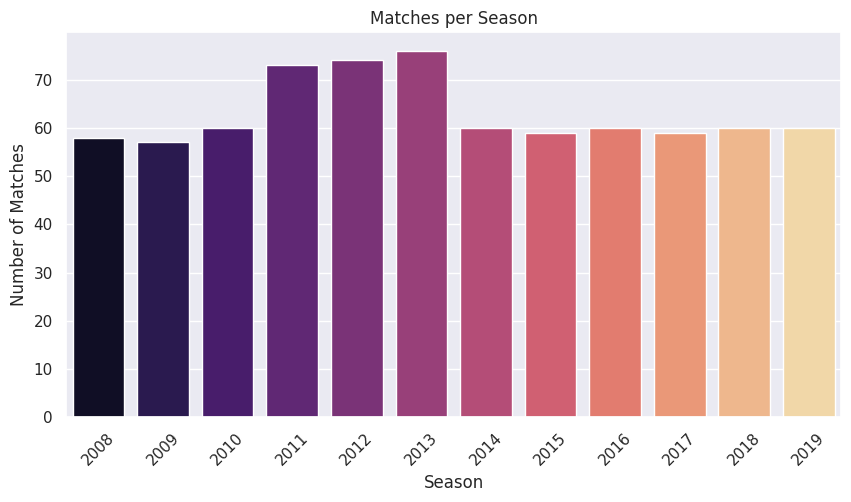

<ipython-input-1-56e7c4af65ee>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='coolwarm')


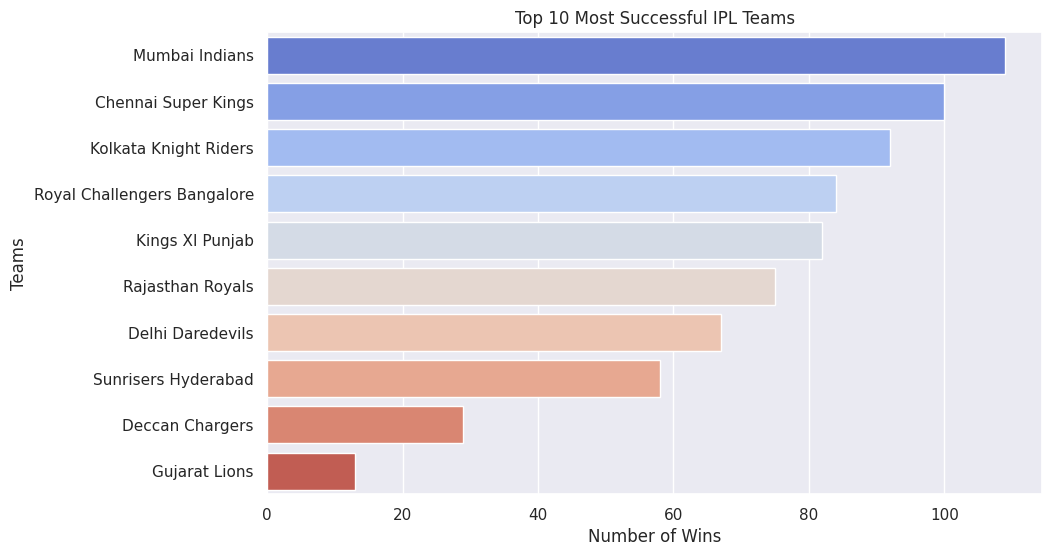

<ipython-input-1-56e7c4af65ee>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')



Toss Winner also won the match in 51.98% of cases.


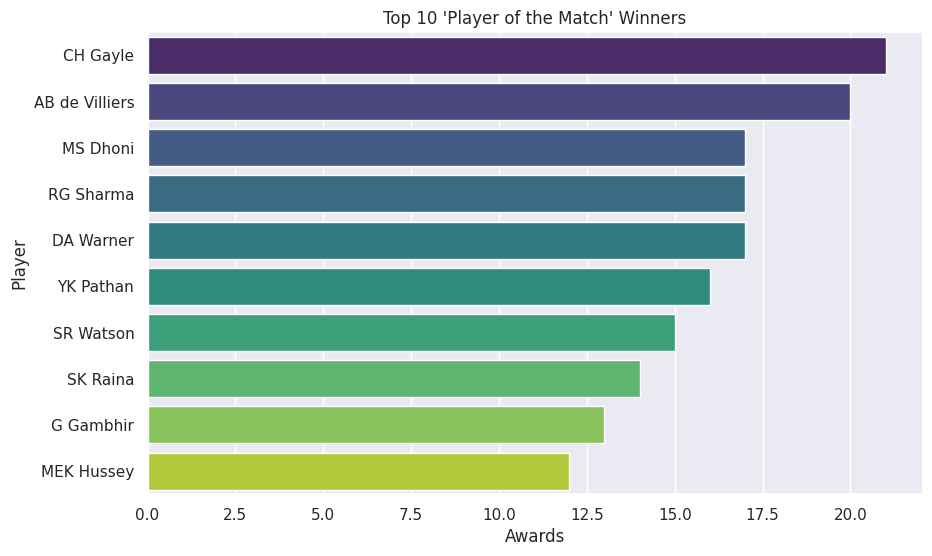

<ipython-input-1-56e7c4af65ee>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_counts.values, y=venue_counts.index, palette='crest')


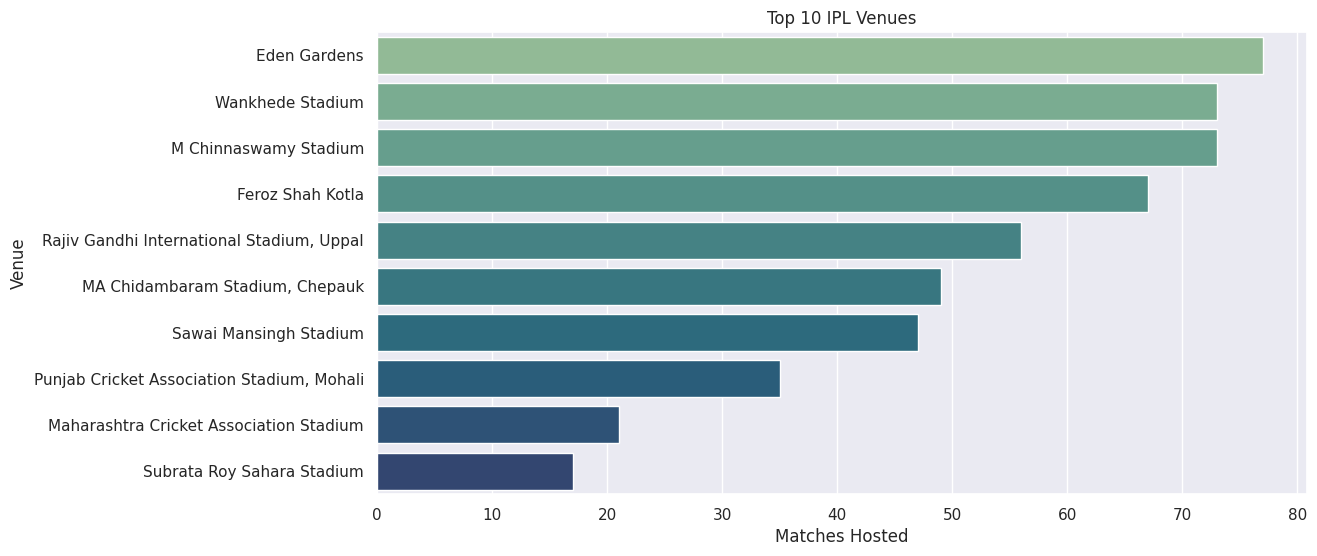


🏃‍♂️ Highest win by runs: Mumbai Indians - 146 runs
🏏 Highest win by wickets: Kolkata Knight Riders - 10 wickets


<ipython-input-1-56e7c4af65ee>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='autumn')


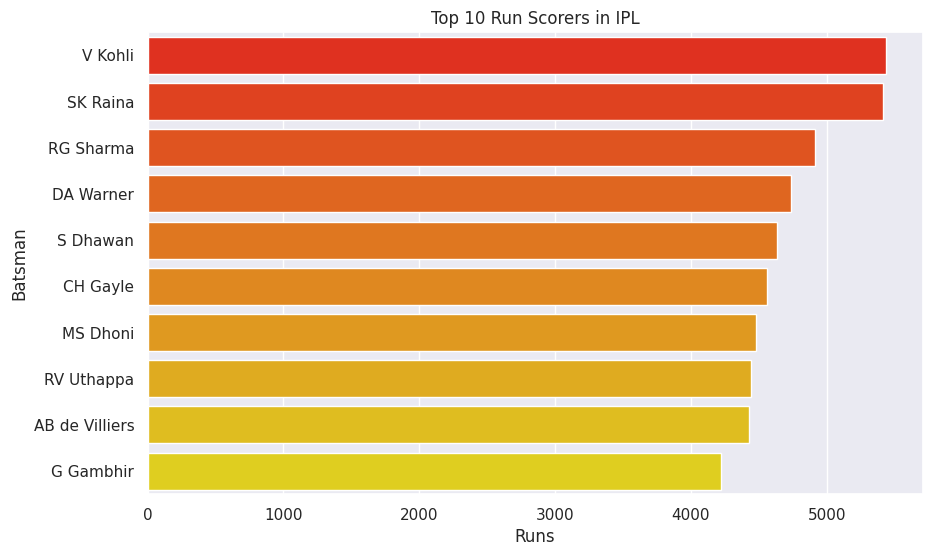

<ipython-input-1-56e7c4af65ee>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='Blues')


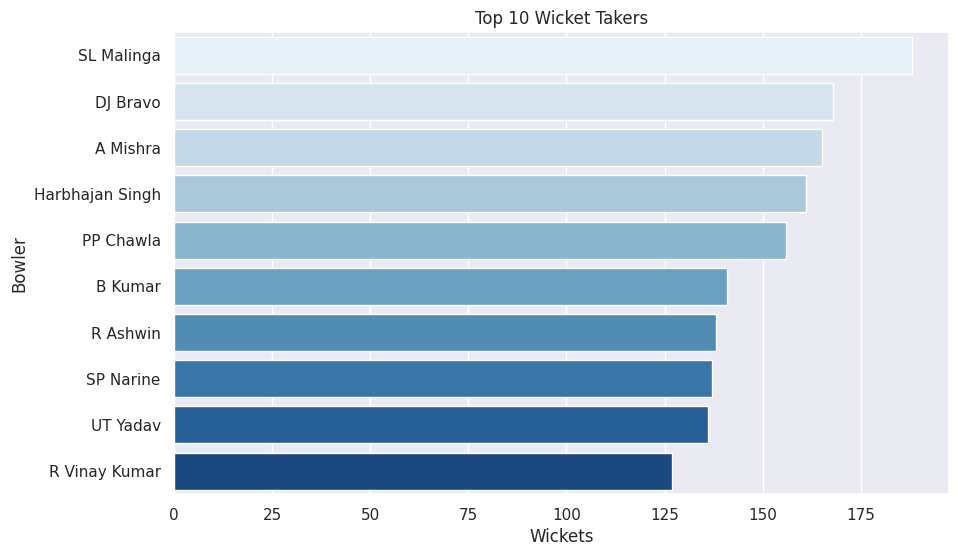

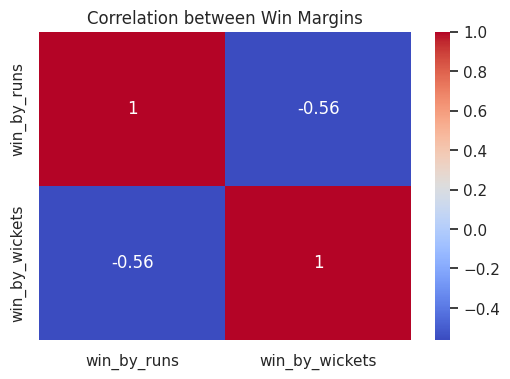

In [1]:
# 📦 Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Set plotting style
sns.set(style="darkgrid")
pd.set_option('display.max_columns', None)

# 📥 Load Data (Upload to Colab first or use the public dataset link if hosted)
from google.colab import files
uploaded = files.upload()  # Upload matches.csv and deliveries.csv manually

matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# 🧹 Basic Exploration
print("Matches dataset shape:", matches.shape)
print("Deliveries dataset shape:", deliveries.shape)
print("\nMatches columns:\n", matches.columns)
print("\nNull values:\n", matches.isnull().sum())

# 🧹 Drop null-heavy columns
matches = matches.drop(['umpire3'], axis=1)

# 📅 Matches Per Season
plt.figure(figsize=(10,5))
sns.countplot(data=matches, x='season', palette='magma')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

# 🏆 Most Successful Teams
top_teams = matches['winner'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='coolwarm')
plt.title("Top 10 Most Successful IPL Teams")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.show()

# 🧠 Toss vs Match Winner Analysis
toss_match_win = matches[matches['toss_winner'] == matches['winner']]
percentage = len(toss_match_win) / len(matches) * 100
print(f"\nToss Winner also won the match in {percentage:.2f}% of cases.")

# 🌟 Top Players of the Match
top_players = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')
plt.title("Top 10 'Player of the Match' Winners")
plt.xlabel("Awards")
plt.ylabel("Player")
plt.show()

# 🏟️ Top Venues
venue_counts = matches['venue'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=venue_counts.values, y=venue_counts.index, palette='crest')
plt.title("Top 10 IPL Venues")
plt.xlabel("Matches Hosted")
plt.ylabel("Venue")
plt.show()

# 🥇 Highest Margin Wins
biggest_run_win = matches.iloc[matches['win_by_runs'].idxmax()]
biggest_wicket_win = matches.iloc[matches['win_by_wickets'].idxmax()]
print(f"\n🏃‍♂️ Highest win by runs: {biggest_run_win['winner']} - {biggest_run_win['win_by_runs']} runs")
print(f"🏏 Highest win by wickets: {biggest_wicket_win['winner']} - {biggest_wicket_win['win_by_wickets']} wickets")

# 🧨 Top Run Scorers
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='autumn')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()

# 🎯 Top Wicket Takers
wicket_data = deliveries[deliveries['player_dismissed'].notnull()]
top_bowlers = wicket_data['bowler'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='Blues')
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

# 🔍 Correlation Heatmap (Numerical Stats)
numerical_cols = ['win_by_runs', 'win_by_wickets']
plt.figure(figsize=(6,4))
sns.heatmap(matches[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Win Margins")
plt.show()
